In [4]:
!pip install statannot
import pandas as pd
import numpy as np
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [5]:
df = pd.read_csv('../data/DES_init_update.csv') # read initial data file
df.info() # check nan values and types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Component#1  1648 non-null   object 
 1   inchi#1      1648 non-null   object 
 2   Smiles#1     1648 non-null   object 
 3   H#1          1637 non-null   float64
 4   T#1          1648 non-null   float64
 5   Component#2  1648 non-null   object 
 6   inchi#2      1648 non-null   object 
 7   Smiles#2     1648 non-null   object 
 8   H#2          1590 non-null   float64
 9   T#2          1648 non-null   float64
 10  T_EP         1648 non-null   float64
 11  X#1          1648 non-null   float64
 12  PD           1648 non-null   object 
 13  Type         1648 non-null   object 
dtypes: float64(6), object(8)
memory usage: 180.4+ KB


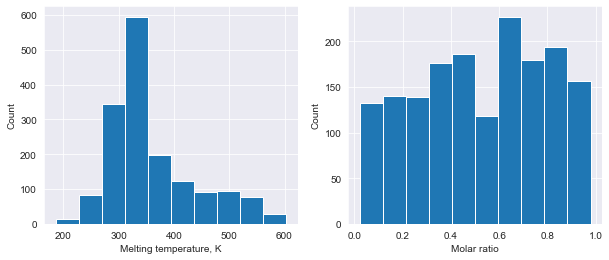

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Type III_Yes v.s. Type III_No: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.660e-61 U_stat=1.391e+05
Type V_Yes v.s. Type V_No: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.254e-07 U_stat=9.538e+03
IL mixture_Yes v.s. Type III_Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.609e-26 U_stat=1.299e+05
Type III_Yes v.s. Type V_Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.005e-72 U_stat=2.632e+05
Type III_No v.s. Type V_No: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.710e-01 U_stat=3.718e+03
IL mixture_Yes v.s. Type V_Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.549e-71 U_stat=7.561e+04


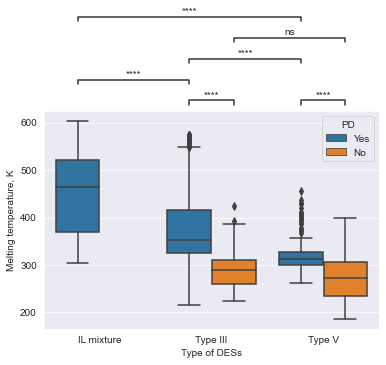

In [6]:
# show the distribution of data
fig, axis = plt.subplots(1,2, figsize=(10,4))
axis[0].hist(df['T_EP'])
axis[0].set_xlabel('Melting temperature, K')
axis[0].set_ylabel('Count')
axis[1].hist(df['X#1'])
axis[1].set_xlabel('Molar ratio')
axis[1].set_ylabel('Count')
plt.show()

# statistical analysis
ax = sns.boxplot(x='Type', y='T_EP', data=df, hue='PD')
ax.set_xlabel('Type of DESs')
ax.set_ylabel('Melting temperature, K')
ax, test_results = add_stat_annotation(ax, x='Type', y='T_EP', data=df, hue='PD',
                                   box_pairs=[(('Type III','No'), ('Type III','Yes')), (('Type V','No'),
                                  ('Type V','Yes')), (('IL mixture','Yes'), ('Type III','Yes')), 
                                  (('IL mixture','Yes'), ('Type V','Yes')), (('Type III','Yes'), 
                                    ('Type V','Yes')), (('Type III','No'), ('Type V','No'))],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.show()

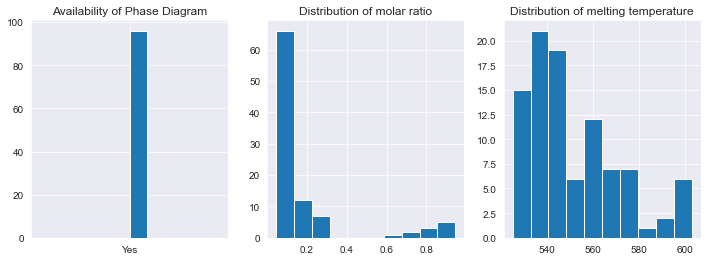

In [7]:
# determine the outliers
Q1, Q3 = np.percentile(df['T_EP'], [25,75])
IQR = Q3 - Q1
outliers = df[(df['T_EP'] > (Q3+1.5*IQR)) | (df['T_EP'] <= (Q1-1.5*IQR))]
fig, axis = plt.subplots(1,3, figsize=(12,4))
axis[0].hist(outliers['PD'])
axis[0].set_title('Availability of Phase Diagram')
axis[1].hist(outliers['X#1'])
axis[1].set_title('Distribution of molar ratio')
axis[2].hist(outliers['T_EP'])
axis[2].set_title('Distribution of melting temperature')
plt.show()

# Most of the outliers were observed at the molar ratio 
# in range from 0 to 0.2.
# Phase diagrams are avaliable for all found outliers, 
# therefore, such data wasn't drop out of dataset.

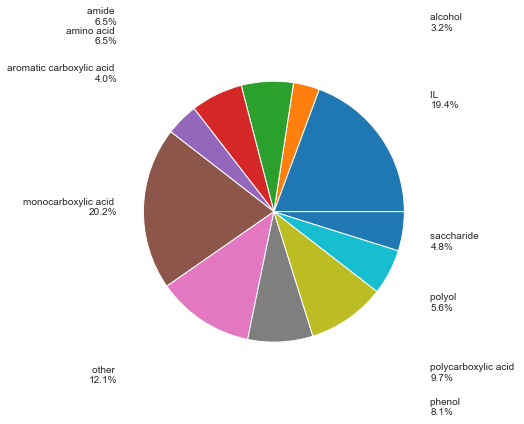

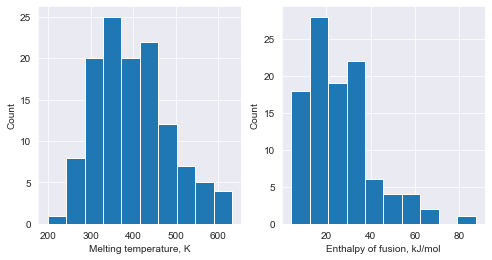

In [8]:
# read the data of individual compounds of DES
compounds = pd.read_csv('../descriptors/compounds/measured/thermochem.csv') 
data = compounds.groupby(by=['Type'])['Component'].count()
labels = [
    'IL',                          
    'alcohol',                     
    'amide',                     
    'amino acid',                 
    'aromatic carboxylic acid',   
    'monocarboxylic acid',   
    'other',         
    'phenol',         
    'polycarboxylic acid',
    'polyol', 
    'saccharide']

# show the classes of compounds
fig, ax = plt.subplots(figsize=(8,6),subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data)
kw = dict(arrowprops=dict(arrowstyle="-"),
          zorder=0, va="center")
perc = [str(round(e / s * 100., 1)) + '%' for s in (sum(data),) for e in data]
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i] + ' \n' + perc[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

# show the distribution of melting temperature and enthalpy of compounds
fig, axis = plt.subplots(1,2, figsize=(8,4))
axis[0].hist(compounds['T'])
axis[0].set_xlabel('Melting temperature, K')
axis[0].set_ylabel('Count')
axis[1].hist(compounds['H'])
axis[1].set_xlabel('Enthalpy of fusion, kJ/mol')
axis[1].set_ylabel('Count')
plt.show()

In [9]:
# preparation of data for ML
cols = ['Component#1','Component#2','Smiles#1','Smiles#2','X#1','T_EP','PD','Type']
df_main = df.copy()[cols]
# creation of labels for same DESs with different molar ratio
df_unique = df_main.drop_duplicates(subset=['Smiles#1','Smiles#2']).reset_index(drop=True)
df_groups = {(df_unique.loc[idx,'Smiles#1'],df_unique.loc[idx,'Smiles#2']):idx for idx in df_unique.index}
for idx in df.index:
    df_main.loc[idx,'groups'] = df_groups[(df.loc[idx,'Smiles#1'],df.loc[idx,'Smiles#2'])]
# round value of molar ratio and drop duplicated data
x = [i/20 for i in range(2,19)]
for idx in df_main.index:
    x1 = df_main.loc[idx,'X#1']
    difference = [abs(x_i-x1) for x_i in x]
    df_main.loc[idx,'X#1'] = x[difference.index(np.min(difference))]
df_main = df_main.sort_values(by = ['T_EP']).drop_duplicates(subset = ['Smiles#1', 'Smiles#2','X#1'], keep = 'first').sort_index()
# save prepared file
df_main.to_csv('../descriptors/mixture/main.csv',index=False)
